# <center> Fraud Detection
    
    
https://www.kaggle.com/c/ieee-fraud-detection

## Librairies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle as pkl
from scipy import stats
from sklearn.decomposition import PCA
import time
import warnings
warnings.filterwarnings("ignore")

## Data

In [2]:
train_identity = pd.read_csv('train_identity.csv')
train_identity.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,...,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,...,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,...,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [3]:
train_transaction = pd.read_csv('train_transaction.csv')
train_transaction.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(f'train_identity shape : {train_identity.shape}')
print(f'train_transaction shape : {train_transaction.shape}')

train_identity shape : (144233, 41)
train_transaction shape : (590540, 394)


In [5]:
print(train_identity.columns)

Index(['TransactionID', 'id_01', 'id_02', 'id_03', 'id_04', 'id_05', 'id_06',
       'id_07', 'id_08', 'id_09', 'id_10', 'id_11', 'id_12', 'id_13', 'id_14',
       'id_15', 'id_16', 'id_17', 'id_18', 'id_19', 'id_20', 'id_21', 'id_22',
       'id_23', 'id_24', 'id_25', 'id_26', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_32', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo'],
      dtype='object')


In [6]:
for col in train_transaction.columns:
    print(col)

TransactionID
isFraud
TransactionDT
TransactionAmt
ProductCD
card1
card2
card3
card4
card5
card6
addr1
addr2
dist1
dist2
P_emaildomain
R_emaildomain
C1
C2
C3
C4
C5
C6
C7
C8
C9
C10
C11
C12
C13
C14
D1
D2
D3
D4
D5
D6
D7
D8
D9
D10
D11
D12
D13
D14
D15
M1
M2
M3
M4
M5
M6
M7
M8
M9
V1
V2
V3
V4
V5
V6
V7
V8
V9
V10
V11
V12
V13
V14
V15
V16
V17
V18
V19
V20
V21
V22
V23
V24
V25
V26
V27
V28
V29
V30
V31
V32
V33
V34
V35
V36
V37
V38
V39
V40
V41
V42
V43
V44
V45
V46
V47
V48
V49
V50
V51
V52
V53
V54
V55
V56
V57
V58
V59
V60
V61
V62
V63
V64
V65
V66
V67
V68
V69
V70
V71
V72
V73
V74
V75
V76
V77
V78
V79
V80
V81
V82
V83
V84
V85
V86
V87
V88
V89
V90
V91
V92
V93
V94
V95
V96
V97
V98
V99
V100
V101
V102
V103
V104
V105
V106
V107
V108
V109
V110
V111
V112
V113
V114
V115
V116
V117
V118
V119
V120
V121
V122
V123
V124
V125
V126
V127
V128
V129
V130
V131
V132
V133
V134
V135
V136
V137
V138
V139
V140
V141
V142
V143
V144
V145
V146
V147
V148
V149
V150
V151
V152
V153
V154
V155
V156
V157
V158
V159
V160
V161
V162
V163
V164
V165
V166
V167

In [7]:
train = pd.merge(train_transaction,train_identity,how='left',on='TransactionID')

In [8]:
print(f'train shape : {train.shape}')

train shape : (590540, 434)


## Data exploration

### Label balance

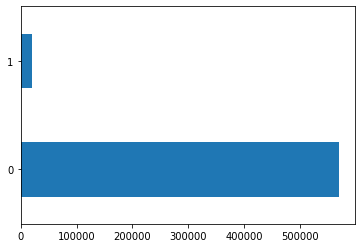

In [9]:
train.isFraud.value_counts().plot(kind = 'barh')

In [10]:
train.isFraud.value_counts()

0    569877
1     20663
Name: isFraud, dtype: int64

In [11]:
(train.isFraud.value_counts()/train.shape[0])*100

0    96.500999
1     3.499001
Name: isFraud, dtype: float64

### Missing data

In [12]:
n = train.shape[0]
percentage_na = (train.isna().sum()/n)*100

In [13]:
col_with_na = [percentage_na.index[i] for i,j in enumerate(percentage_na) if j>0]
print(f'Number of columns with missing data : {len(col_with_na)}')

Number of columns with missing data : 414


In [14]:
# Check is the target has some missing labels
train.isFraud.isna().sum()

0

In [15]:
col = percentage_na.index
col_90_pct_na = []
for i,j in enumerate(percentage_na):
    if j>=90:
        col_90_pct_na.append(col[i])
        print(col[i], ' : ', round(j,2))

dist2  :  93.63
D7  :  93.41
id_07  :  99.13
id_08  :  99.13
id_18  :  92.36
id_21  :  99.13
id_22  :  99.12
id_23  :  99.12
id_24  :  99.2
id_25  :  99.13
id_26  :  99.13
id_27  :  99.12


In [56]:
"""n_0 = train[train.isFraud==0].shape[0]
percentage_na = (train[train.isFraud==0].isna().sum()/n_0)*100
col_with_na = [percentage_na.index[i] for i,j in enumerate(percentage_na) if j>0]
print(f'Number of columns with missing data : {len(col_with_na)}')

col = percentage_na.index
col_90_pct_na = []
for i,j in enumerate(percentage_na):
    if j>=90:
        col_90_pct_na.append(col[i])
        print(col[i], ' : ', round(j,2))

n_1 = train[train.isFraud==1].shape[0]
percentage_na = (train[train.isFraud==1].isna().sum()/n_1)*100
col_with_na = [percentage_na.index[i] for i,j in enumerate(percentage_na) if j>0]
print(f'Number of columns with missing data : {len(col_with_na)}')

col = percentage_na.index
col_90_pct_na = []
for i,j in enumerate(percentage_na):
    if j>=90:
        col_90_pct_na.append(col[i])
        print(col[i], ' : ', round(j,2))"""

"n_0 = train[train.isFraud==0].shape[0]\npercentage_na = (train[train.isFraud==0].isna().sum()/n_0)*100\ncol_with_na = [percentage_na.index[i] for i,j in enumerate(percentage_na) if j>0]\nprint(f'Number of columns with missing data : {len(col_with_na)}')\n\ncol = percentage_na.index\ncol_90_pct_na = []\nfor i,j in enumerate(percentage_na):\n    if j>=90:\n        col_90_pct_na.append(col[i])\n        print(col[i], ' : ', round(j,2))\n\nn_1 = train[train.isFraud==1].shape[0]\npercentage_na = (train[train.isFraud==1].isna().sum()/n_1)*100\ncol_with_na = [percentage_na.index[i] for i,j in enumerate(percentage_na) if j>0]\nprint(f'Number of columns with missing data : {len(col_with_na)}')\n\ncol = percentage_na.index\ncol_90_pct_na = []\nfor i,j in enumerate(percentage_na):\n    if j>=90:\n        col_90_pct_na.append(col[i])\n        print(col[i], ' : ', round(j,2))"

<b> pas d'impact en fonction de la class 

<b> most columns from train identity

In [16]:
print(f'Number of columns with over 90% of missing variables : {len(col_90_pct_na)}')

Number of columns with over 90% of missing variables : 12


In [17]:
new_train = train.drop(col_90_pct_na,axis=1)

In [18]:
new_train.shape

(590540, 422)

In [19]:
new_col_with_na = [col[i] for i,j in enumerate(percentage_na) if col[i] not in col_90_pct_na and j>0]

In [20]:
print(f'Number of col with na : {len(new_col_with_na)}')

Number of col with na : 402


In [21]:
new_train[new_col_with_na].var()

card2    24898.708581
card3      128.514962
card5     1701.104900
addr1    10351.245683
addr2        7.239455
             ...     
id_14     8778.847081
id_17      922.662525
id_19    19907.895822
id_20    23152.765179
id_32       13.968921
Length: 374, dtype: float64

### Fill na with median and most occurence categorical feature

In [22]:
train_tmp = new_train.fillna(new_train.median())
train_fill = train_tmp.fillna(train_tmp.mode().iloc[0])

In [23]:
train_fill.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,361.0,150.0,discover,142.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,chrome 63.0,24.0,1920x1080,match_status:2,T,F,T,F,desktop,Windows
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


## Data Analysis

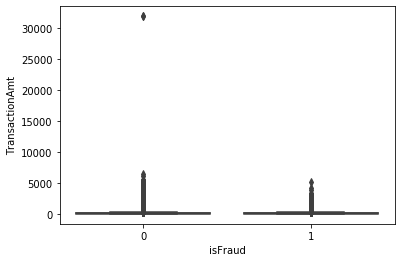

In [24]:
sns.boxplot(train_fill.isFraud, train_fill.TransactionAmt)

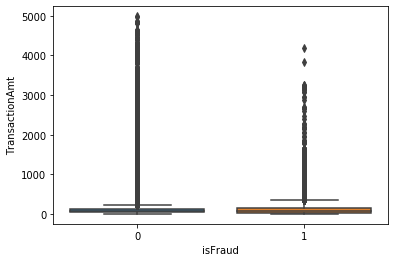

In [25]:
train_tmp = train_fill[train_fill['TransactionAmt']<5000]
sns.boxplot(train_tmp.isFraud, train_tmp.TransactionAmt)

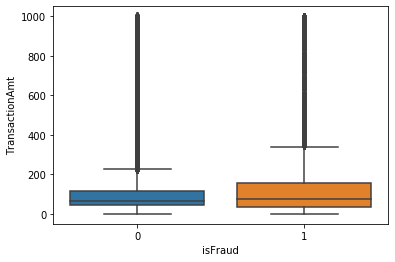

In [26]:
train_tmp = train_fill[train_fill['TransactionAmt']<1000]
sns.boxplot(train_tmp.isFraud, train_tmp.TransactionAmt)

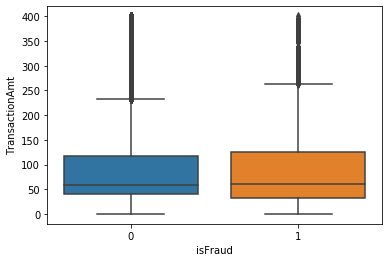

In [27]:
train_tmp = train_fill[train_fill['TransactionAmt']<400]
sns.boxplot(train_tmp.isFraud, train_tmp.TransactionAmt)

<b> Keep the outliers because they can be usefull

In [28]:
train_fill.card4.value_counts()

visa                386344
mastercard          189217
american express      8328
discover              6651
Name: card4, dtype: int64

In [29]:
train_fill_0 = train_fill[train_fill['isFraud']==0]
n_0 = train_fill_0.shape[0]
train_fill_0.DeviceType.value_counts()/n_0*100

desktop    91.228283
mobile      8.771717
Name: DeviceType, dtype: float64

In [30]:
train_fill_1 = train_fill[train_fill['isFraud']==1]
n_1 = train_fill_1.shape[0]
train_fill_1.DeviceType.value_counts()/n_1*100

desktop    72.622562
mobile     27.377438
Name: DeviceType, dtype: float64

<b> We can see that a transaction is more likely to be a fraud if it happen on a mobile 

In [31]:
device_info_tmp = train_fill_1.DeviceInfo.value_counts()/n_1*100
for name,perc in zip(device_info_tmp.index,device_info_tmp):
    if perc>0.7:
        print(name, perc)

Windows 73.45012824856023
iOS Device 6.001064705028311
MacOS 1.3453999903208633
hi6210sft Build/MRA58K 0.8711222958912066
SM-A300H Build/LRX22G 0.8178870444756329


In [32]:
device_info_tmp = train_fill_0.DeviceInfo.value_counts()/n_0*100
for name,perc in zip(device_info_tmp.index,device_info_tmp):
    if perc>0.7:
        print(name, perc)

Windows 88.5136617199852
iOS Device 3.2536845670206023
MacOS 2.157483106003576
Trident/7.0 1.2886991403408103


<b> If a transaction if from the device hi6210sft Build/MRA58K or SM-A300H Build/LRX22G, it is more likely to be a fraud than if it is from the device Trident/7.0

In [33]:
corr_Fraud = train_fill.corrwith(train_fill["isFraud"])

### Features corrolated to Target

In [34]:
corr_fraud = corr_Fraud[(corr_Fraud>0.1) | (corr_Fraud<-0.1)]
print(corr_fraud)

isFraud    1.000000
card3      0.154028
V15        0.154755
V16        0.151645
V17        0.158972
             ...   
V302       0.132889
V303       0.124274
V304       0.131484
id_01     -0.123101
id_17      0.163755
Length: 97, dtype: float64


### Features independant to Target

In [35]:
col_indep_fill = []
for i in train_fill.columns:
    x = train_fill[i].dropna()
    if (type(x.iloc[0])==str) :
        pval = stats.chi2_contingency(pd.crosstab(train_fill["isFraud"],train_fill[i]))[1]
    else:
        u = train_fill[i][train_fill["isFraud"]==0]
        v = train_fill[i][train_fill["isFraud"]==1]
        pval = stats.ttest_ind(u,v)[1]
    if pval>=0.05:
        col_indep_fill.append(i)
print(col_indep_fill)

['D13', 'M1', 'M2', 'V1', 'V2', 'V7', 'V8', 'V14', 'V88', 'V106', 'V128', 'V135', 'V136', 'V137', 'V167', 'V168', 'V177', 'V178', 'V179', 'V202', 'V203', 'V204', 'V205', 'V206', 'V207', 'V241', 'V251', 'V266', 'V267', 'V269', 'V280', 'V295', 'V297', 'V298', 'V299', 'V305', 'V306', 'V311', 'V318', 'V319', 'V321', 'V326', 'V328', 'V334', 'V335', 'V336', 'V337', 'id_36']


### Features correlated to each other

### Columns C..

In [36]:
col_Cx = [col for col in train_fill.columns if col.startswith("C") and col[-1].isdigit()]

col_Cx_drop = []
for i,col in enumerate(col_Cx):
    if col not in col_Cx_drop:
        corr_Cx = train_fill[col_Cx[i+1:]].corrwith(train_fill[col])
        corr_Cx_tmp = corr_Cx[(corr_Cx>=0.9) | (corr_Cx<=-0.9)]
        if not corr_Cx_tmp.index.empty:
            col_Cx_drop = col_Cx_drop + list(corr_Cx_tmp.index)

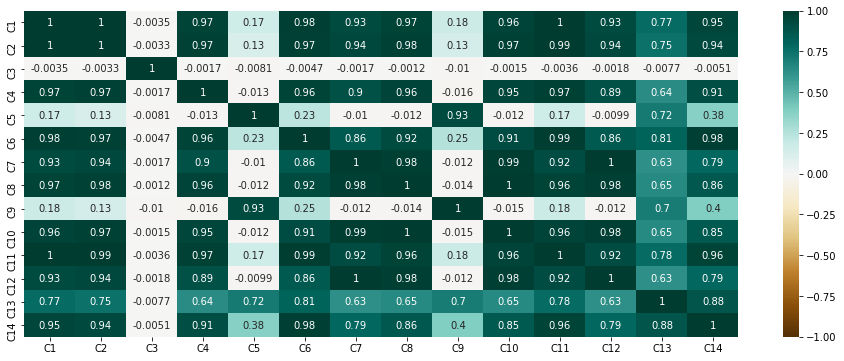

In [37]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_fill[col_Cx].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

- C1 : C2, C4, C6, C7, C8, C10, C11, C12, C13, C14
- C3  
- C5 : C9
- C13

Nous pouvons garder C1, C3, C5 et C13 pour représenter tout le reste





In [38]:
col_C = [col for col in col_Cx if col not in col_Cx_drop]
print(col_C)

['C1', 'C3', 'C5', 'C13']


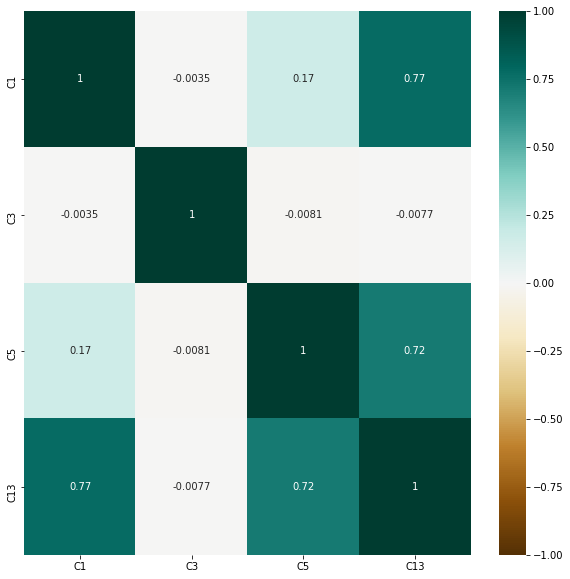

In [39]:
plt.figure(figsize=(10, 10))
heatmap = sns.heatmap(train_fill[col_C].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

### Columns D..

In [40]:
col_Dx = [col for col in train_fill.columns if col.startswith("D") and col[-1].isdigit()]

col_Dx_drop = []
for i,col in enumerate(col_Dx):
    if col not in col_Dx_drop:
        corr_Dx = train_fill[col_Dx[i+1:]].corrwith(train_fill[col])
        corr_Dx_tmp = corr_Dx[(corr_Dx>=0.9) | (corr_Dx<=-0.9)]
        if not corr_Dx_tmp.index.empty:
            col_Dx_drop = col_Dx_drop + list(corr_Dx_tmp.index)

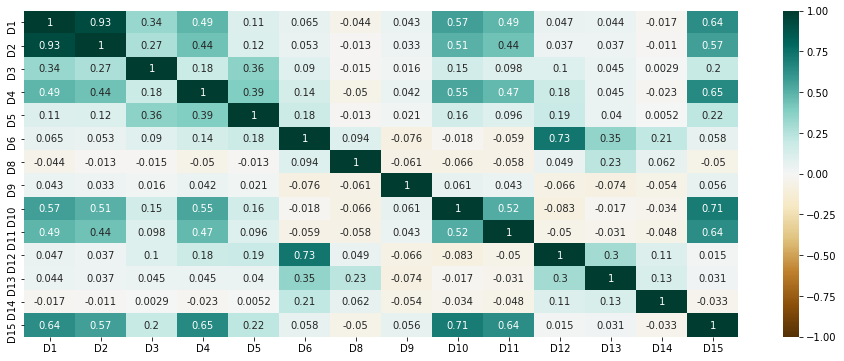

In [41]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_fill[col_Dx].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

In [42]:
print(col_Dx_drop)

['D2']


### Columns M..

In [43]:
col_Mx = [col for col in train_fill.columns if col.startswith("M") and col[-1].isdigit()]

col_Mx_drop = []
for i,col in enumerate(col_Mx):
    if col not in col_Mx_drop:
        corr_Mx = train_fill[col_Mx[i+1:]].corrwith(train_fill[col])
        corr_Mx_tmp = corr_Mx[(corr_Mx>=0.9) | (corr_Mx<=-0.9)]
        if not corr_Mx_tmp.index.empty:
            col_Mx_drop = col_Mx_drop + list(corr_Mx_tmp.index)

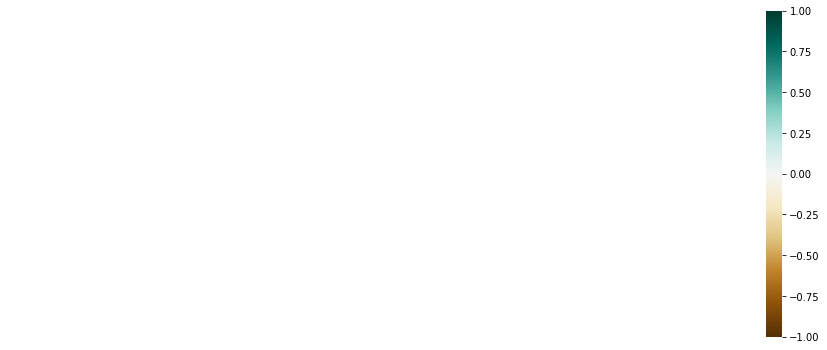

In [44]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(train_fill[col_Mx].corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
plt.show()

In [45]:
print(col_Mx_drop)

[]


### columns V..

In [46]:
col_Vx = [col for col in train_fill.columns if col.startswith("V") and col[-1].isdigit()]
print(len(col_Vx))

339


In [47]:
col_Vx_drop = []
for i,col in enumerate(col_Vx):
    if col not in col_Vx_drop:
        corr_Vx = train_fill[col_Vx[i+1:]].corrwith(train_fill[col])
        corr_Vx_tmp = corr_Vx[(corr_Vx>=0.9) | (corr_Vx<=-0.9)]
        if not corr_Vx_tmp.index.empty:
            col_Vx_drop = col_Vx_drop + list(corr_Vx_tmp.index)
            
print(len(col_Vx_drop))

195


In [48]:
col_V = [col for col in col_Vx if col not in col_Vx_drop and col not in corr_fraud]
print(len(col_V))

140


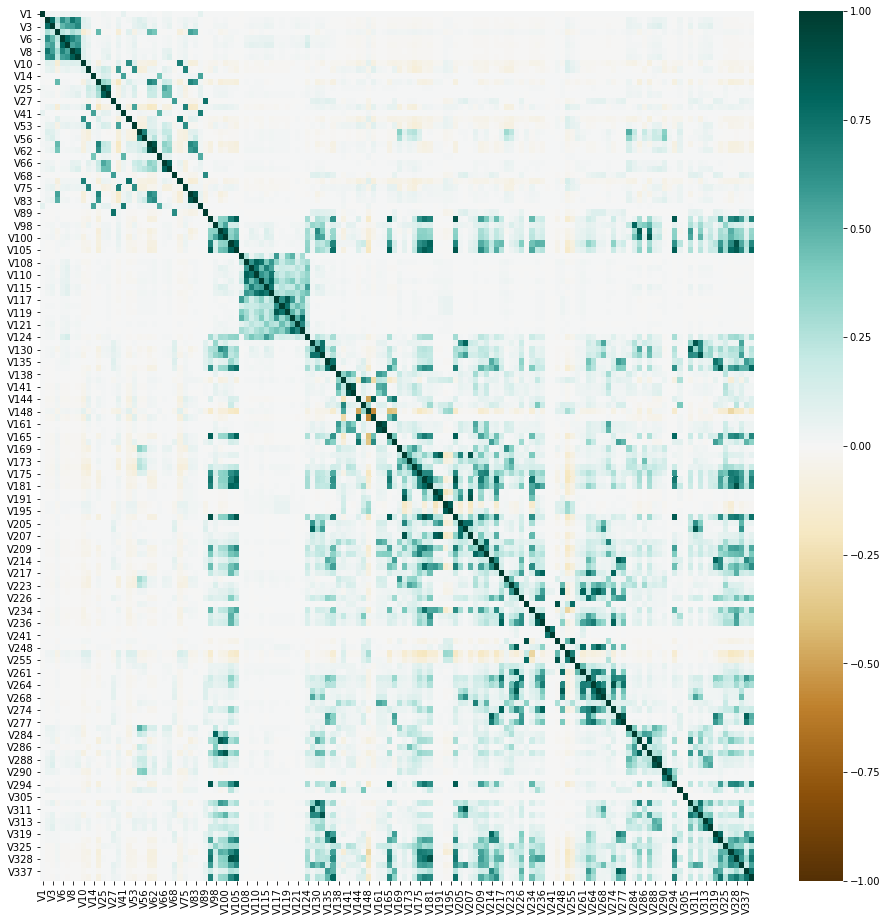

In [49]:
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(train_fill[col_V].corr(), vmin=-1, vmax=1,cmap='BrBG')
plt.show()

## New dataset

In [50]:
col_tmp = train_fill.columns
col_del = col_Cx_drop + col_Vx_drop
col_tmp = [col for col in col_tmp if col not in col_del]
col_corr = col_tmp 
col_keep = [col for col in col_corr if col not in col_indep_fill]

In [51]:
train_keep = train_fill[col_keep]

In [52]:
print(train_keep.shape)

(590540, 242)


## Put the transformed data in a pickle

In [53]:
with open('train_keep.pkl', 'wb') as f:
    pkl.dump(train_keep, f)
    f.close()